 # DBSCAN Credit Card Segmentation Project
 # Srirama Manaswin Nanda Vardhan
 # 2023000090
 # Data Warehousing and Data Mining (DWDM)


In [1]:

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

sns.set(style="whitegrid")

# Step 2: Load Dataset from GitHub (your hosted link)
url = "https://raw.githubusercontent.com/manaswin-srirama/DBSCAN_CreditCard_Project-DWDM-CASE-STUDY-2023000090-/refs/heads/main/CC%20GENERAL.csv"
df = pd.read_csv(url)
print("✅ Dataset loaded successfully from GitHub")
print("Shape:", df.shape)
df.head()


✅ Dataset loaded successfully from GitHub
Shape: (8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [2]:
# Step 3: Select useful numeric features
X = df[['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS']].dropna()

# Step 4: Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Apply DBSCAN
db = DBSCAN(eps=0.5, min_samples=8)
labels = db.fit_predict(X_scaled)

# Step 6: Add cluster labels
df['Cluster'] = -1
df.loc[X.index, 'Cluster'] = labels

# Step 7: Results summary
print("Unique Clusters:", np.unique(labels))
print("Cluster Counts:")
print(df['Cluster'].value_counts())


Unique Clusters: [-1  0  1  2]
Cluster Counts:
Cluster
 0    8231
-1     707
 2       8
 1       4
Name: count, dtype: int64


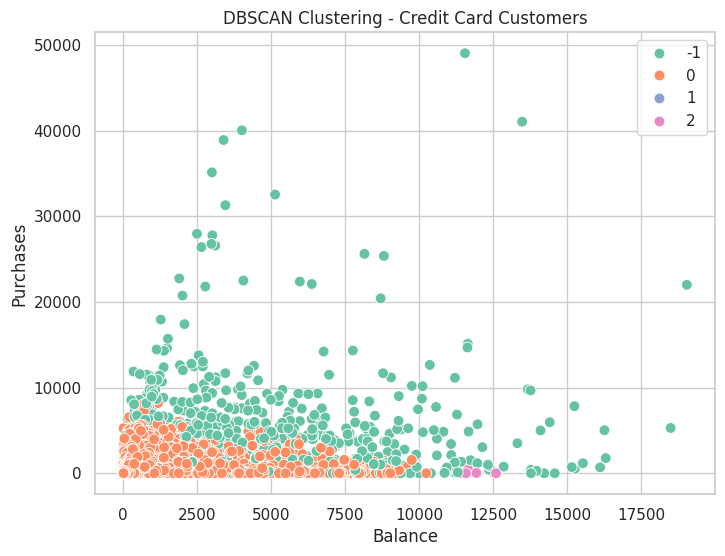

✅ Total Clusters Found: 3
🚨 Outliers Detected: 706


In [4]:
# Step 8: Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X['BALANCE'],
    y=X['PURCHASES'],
    hue=labels,
    palette='Set2',
    s=60
)
plt.title("DBSCAN Clustering - Credit Card Customers")
plt.xlabel("Balance")
plt.ylabel("Purchases")
plt.show()

# Step 9: Final Insights
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
num_outliers = list(labels).count(-1)
print(f"✅ Total Clusters Found: {num_clusters}")
print(f"🚨 Outliers Detected: {num_outliers}")
